### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
#Investigate data to determine the cleaning strategy
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

3. Decide what to do about your missing data -- drop, replace, other...

In [5]:
#drop column car. There are only 108 non-null values and doesn't add value to the analysis
data = data.drop(columns=['car'])

#Convert age to int column
data['age'] = data['age'].replace(['50plus'],50).replace("below21", "20").astype(int)

#Replace all the null values to even out the distribution of data.
data.fillna('never', inplace=True)
nan_rows  = data[data.isna().any(axis=1)]
nan_rows

#convert income range to lowest income
data['income']=data['income'].astype(str).str.rsplit(" ").str[0].str.replace(r'[^\d.]+', '',regex=True).replace('',12500).astype(int)

In [6]:
#validate data quality, data types and distribution

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  int32 
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  int32 
 14  Bar                   12684 non-null  object
 15  CoffeeHouse           12684 non-null

4. What proportion of the total observations chose to accept the coupon? 



In [7]:
#how many accepted and did not accept the coupon
coupon_accept = data.groupby(['Y','coupon'])['coupon'].count()
coupon_accept


Y  coupon               
0  Bar                      1190
   Carry out & Take away     633
   Coffee House             2001
   Restaurant(20-50)         834
   Restaurant(<20)           816
1  Bar                       827
   Carry out & Take away    1760
   Coffee House             1995
   Restaurant(20-50)         658
   Restaurant(<20)          1970
Name: coupon, dtype: int64

In [8]:
# proportion of the total observations chose to accept the coupon
coupon_proportion =(data[data['Y']==1].groupby(['coupon'])['coupon'].count()/ data.groupby(['coupon'])['coupon'].count())*100
coupon_proportion.round(2)

coupon
Bar                      41.00
Carry out & Take away    73.55
Coffee House             49.92
Restaurant(20-50)        44.10
Restaurant(<20)          70.71
Name: coupon, dtype: float64

5. Use a bar plot to visualize the `coupon` column.

[Text(0.5, 0, 'Coupon Acceptance'),
 Text(0, 0.5, 'Coupon Type'),
 Text(0.5, 1.0, 'Bar plot to Visualize Coupon Acceptance Rate')]

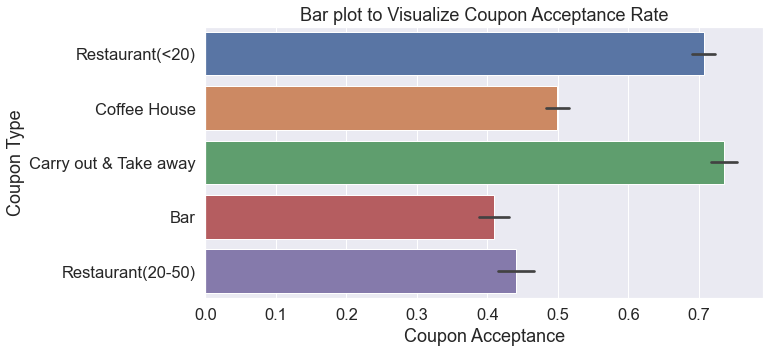

In [9]:
#Bar plot to visualize the coupon
sns.set(rc={"figure.figsize":(10, 5)}, font_scale=1.5)

ax = sns.barplot(data = data, x = 'Y', y = 'coupon')

ax.set(xlabel='Coupon Acceptance',
       ylabel='Coupon Type', title='Bar plot to Visualize Coupon Acceptance Rate')

6. Use a histogram to visualize the temperature column.

[Text(0.5, 0, 'Temperature'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Histogram of the Life Expectancy')]

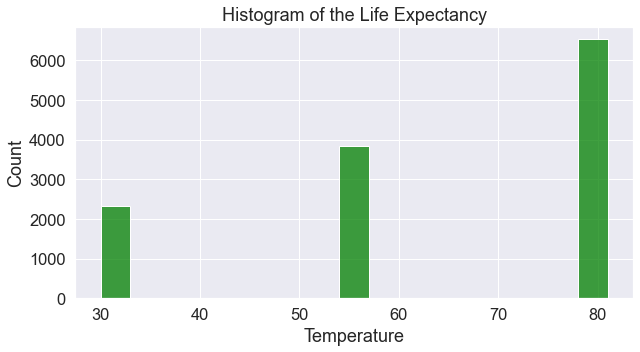

In [10]:
sns.set(rc={"figure.figsize":(10, 5)}, font_scale=1.5)

ax = sns.histplot(data=data,x="temperature",color='green',binwidth=3)

ax.set(xlabel='Temperature',
       ylabel='Count', title='Histogram of the Life Expectancy')

#alternate plot method for histogram
#plt.hist(data['temperature'], edgecolor = 'black', bins = 15)
#plt.title('Histogram of Temperature');


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [11]:
#Filter the bar coupons for more analysis

data_bar = data[data['coupon']=='Bar']


2. What proportion of bar coupons were accepted?


In [12]:
#Calculate percentage of bar coupons accepted

bar_accept = (data_bar[data_bar['Y']==1].groupby(['coupon'])['coupon'].count()/data_bar.groupby(['coupon'])['coupon'].count())*100
bar_accept.round(2)

coupon
Bar    41.0
Name: coupon, dtype: float64

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [13]:
#Determine the proportion of  acceptance rate with bar visits 3 or fewer times

bar_accept_3orfewer = (data_bar[(data_bar['Y']==1)&(data_bar['Bar'].isin(['1~3', 'less1']))].groupby(['coupon'])['coupon'].count()/data_bar[(data_bar['Y']==1)].groupby(['coupon'])['coupon'].count())*100


#Determine the proportion of  acceptance rate with bar visits more than 3 times
bar_accept_4ormore = (data_bar[(data_bar['Y']==1)&(data_bar['Bar'].isin(['4~8', 'gt8']))].groupby(['coupon'])['coupon'].count()/data_bar[(data_bar['Y']==1)].groupby(['coupon'])['coupon'].count())*100

#create a data frame to compare the proportions
bar_accept_by_visits = pd.DataFrame({"bar_accept_3orfewer" : bar_accept_3orfewer.round(2),
                                     "bar_accept_4ormore" : bar_accept_4ormore.round(2)
                                    })
bar_accept_by_visits


,bar_accept_3orfewer,bar_accept_4ormore
coupon,,
Bar,61.67,18.5


[Text(0.5, 0, 'Bar Visit Count'),
 Text(0, 0.5, 'Total Acceptance'),
 Text(0.5, 1.0, 'Relationship between Bar visits and Coupon Acceptance Rate')]

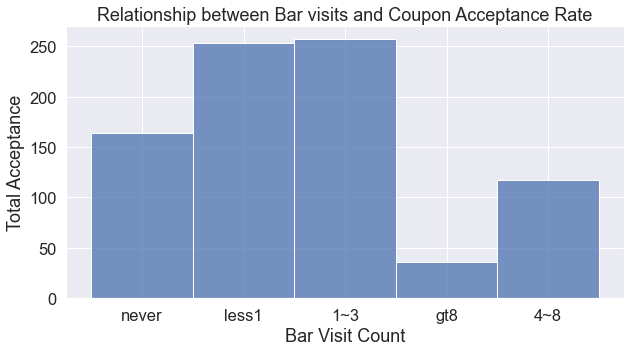

In [14]:
#Plot the bar visits to visualize the acceptance rate across all visit ranges

sns.set(rc={"figure.figsize":(10, 5)}, font_scale=1.5)

ax = sns.histplot(data = data_bar[data_bar['Y']==1], x = 'Bar')

ax.set(xlabel='Bar Visit Count',
       ylabel='Total Acceptance', title='Relationship between Bar visits and Coupon Acceptance Rate')

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [15]:
#Acceptance rate with bar visits > 1 and age > 25 vs all others

bar_accept_over25 = (data_bar[(data_bar['Y']==1)&(~data_bar['Bar'].isin(['less1', 'never']))&(data_bar['age'] > 25)].groupby(['coupon'])['coupon'].count()/data_bar[data_bar['Y']==1].groupby(['coupon'])['coupon'].count())*100
bar_accept_over25


coupon
Bar    35.308343
Name: coupon, dtype: float64

[Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'Bar Visit Count'),
 Text(0.5, 1.0, 'Coupon Acceptance Rate by Bar visits and age')]

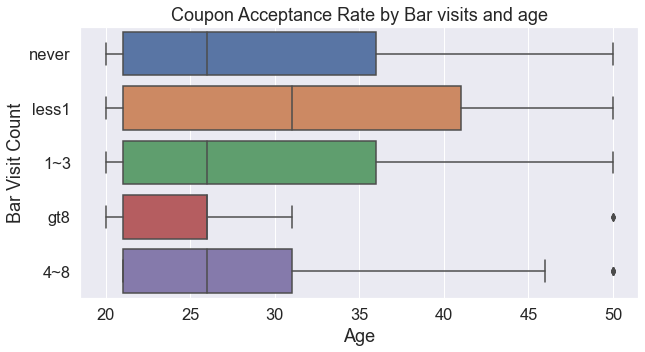

In [16]:
#visualize the bar visit count and age > 25
sns.set(rc={"figure.figsize":(10, 5)}, font_scale=1.5)

ax = sns.boxplot(data = data_bar[data_bar['Y']==1], x = 'age', y = 'Bar')

ax.set(xlabel='Age',
       ylabel='Bar Visit Count', title='Coupon Acceptance Rate by Bar visits and age')

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [17]:
#Acceptance rate for bar visits > 1 and no kids and occupation other than farming, fishing, or forestry.

bar_accept_nokids = (data_bar[(data_bar['Y']==1)&(~data_bar['Bar'].isin(['less1', 'never']))&(data_bar['has_children'] == 0)&(~data_bar['occupation'].isin(['Farming Fishing & Forestry']))].groupby(['coupon'])['coupon'].count()/data_bar[data_bar['Y']==1].groupby(['coupon'])['coupon'].count())*100
bar_accept_nokids

coupon
Bar    35.308343
Name: coupon, dtype: float64

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [18]:
#go to bars more than once a month, had passengers that were not a kid, and were not widowed OR
bar_criteria1 = (data_bar[(data_bar['Y']==1)&(~data_bar['Bar'].isin(['less1', 'never']))&(data_bar['has_children'] == 0)&(~data_bar['maritalStatus'].isin(['widowed']))].groupby(['coupon'])['coupon'].count()/data_bar[data_bar['Y']==1].groupby(['coupon'])['coupon'].count())*100
#print(bar_criteria1)

#go to bars more than once a month and are under the age of 30 OR
bar_criteria2 = (data_bar[(data_bar['Y']==1)&(~data_bar['Bar'].isin(['less1', 'never']))&(data_bar['age'] < 30)].groupby(['coupon'])['coupon'].count()/data_bar[data_bar['Y']==1].groupby(['coupon'])['coupon'].count())*100
#print(bar_criteria2)

#go to cheap restaurants more than 4 times a month and income is less than 50K.
bar_criteria3 = (data_bar[(data_bar['Y']==1)&(data_bar['RestaurantLessThan20'].isin(['4~8', 'gt8']))&(data_bar['income'] < 50000)].groupby(['coupon'])['coupon'].count()/data_bar[data_bar['Y']==1].groupby(['coupon'])['coupon'].count())*100
#print(bar_criteria3)

#create a data frame to compare the proportions
bar_accept_by_visits = pd.DataFrame({"bar_nokid_notwidow" : bar_criteria1,
                                     "bar_age_under30" : bar_criteria2,
                                     "bar_cheapRestaurant" :bar_criteria3
                                    })

bar_accept_by_visits

,bar_nokid_notwidow,bar_age_under30,bar_cheapRestaurant
coupon,,,
Bar,35.308343,30.108827,18.863362


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

## Data Analysis about drivers who accepted Bar coupons

### Observations
<ol>
<li>41% of bar coupon was accepted.</li>
<li>61.67% was accepted by people who went to the bar 3 or fewer times.</li>
<li>18.5% was accepted by people who went to the bar more than 3 times.</li>
<li>35.3% of the drivers who go to the bar more than once and over 25 accept coupon.</li>
<li>Interestingly, 35.3% of the drivers who accept the coupon have no kids and do not work in Farming, Fishing or Forestry.</li>
<li>35.3% of acceptance is also satisfied by people who are not widowed. Indicating, widowed people who go to bar less than once a month, don't accept the coupon.</li>
<li>30% of the drivers who visit more than once are of age&lt;30. </li>
<li>18% of the drivers with income &lt;50K and who visit cheap restaurants more than 4 times accept the coupon.</li>
</ol>

### Hypothesis
<ol>
<li>Drivers who visit less than 3 times are more likely to accept the coupon</li>
<li>Drivers who vist more than once with no kids and do not work in Farming, Fishing or Forestry, are more likely to accept the coupon</li>
<li>Coupons are mostly not accepted by widowed drivers who visit less than once and people whose occupation is Farming, Fishing or Forestry</li>
<li>Drivers who visit more than once and of age &lt;30 are more likely to accept the coupon </li>
<li>Drivers who go to bar more than once a month with no kid, not widowed and age &lt;30 are more likely to accept a coupon.</li>
</ol>

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [19]:
#new DataFrame that contains just the Coffee House coupons.

data_CH = data[data['coupon']=='Coffee House']

#What proportion of coffee house coupons were accepted
CH_accept = (data_CH[data_CH['Y']==1].groupby(['coupon'])['coupon'].count()/data_CH.groupby(['coupon'])['coupon'].count())*100
CH_accept.round(2)


coupon
Coffee House    49.92
Name: coupon, dtype: float64

1. Compare the acceptance rate between those who went to a CH 3 or fewer times a month to those who went more.

In [20]:

CH_accept_3orfewer = (data_CH[(data_CH['Y']==1)&(data_CH['CoffeeHouse'].isin(['1~3', 'less1']))].groupby(['coupon'])['coupon'].count()/data_CH[(data_CH['Y']==1)].groupby(['coupon'])['coupon'].count())*100
print('Acceptance Rate of those who went to a CH 3 or fewer times',CH_accept_3orfewer.round(2))

CH_accept_4ormore = (data_CH[(data_CH['Y']==1)&(data_CH['CoffeeHouse'].isin(['4~8', 'gt8']))].groupby(['coupon'])['coupon'].count()/data_CH[(data_CH['Y']==1)].groupby(['coupon'])['coupon'].count())*100
print('Acceptance Rate of those who went to a CH more than 3 times',CH_accept_4ormore.round(2))


Acceptance Rate of those who went to a CH 3 or fewer times coupon
Coffee House    59.8
Name: coupon, dtype: float64
Acceptance Rate of those who went to a CH more than 3 times coupon
Coffee House    29.77
Name: coupon, dtype: float64


2. Compare the acceptance rate between drivers who go to a CH more than once a month and are over the age of 25 to the all others. Is there a difference?

In [21]:
CH_accept_over25 = (data_CH[(data_CH['Y']==1)&(~data_CH['CoffeeHouse'].isin(['less1', 'never']))&(data_CH['age'] > 25)].groupby(['coupon'])['coupon'].count()/data_CH[data_CH['Y']==1].groupby(['coupon'])['coupon'].count())*100
CH_accept_over25

coupon
Coffee House    43.458647
Name: coupon, dtype: float64

3. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.

In [22]:

CH_accept_nokids = (data_CH[(data_CH['Y']==1)&(~data_CH['CoffeeHouse'].isin(['less1', 'never']))&(data_CH['has_children'] == 0)&(~data_CH['occupation'].isin(['Farming Fishing & Forestry']))].groupby(['coupon'])['coupon'].count()/data_CH[data_CH['Y']==1].groupby(['coupon'])['coupon'].count())*100
CH_accept_nokids

coupon
Coffee House    39.197995
Name: coupon, dtype: float64

4. Compare the acceptance rates between those drivers who:
<ol>
    <li>go to Coffee House more than once a month, had passengers that were not a kid, and were not widowed OR</li>
    <li>go to Coffee House more than once a month and are under the age of 30 OR</li>
    <li>go to cheap restaurants more than 4 times a month and income is less than 50K.</li>
</ol>

In [23]:
#Compare the acceptance rates between those drivers who:
#go to Coffee House more than once a month, had passengers that were not a kid, and were not widowed OR
CH_criteria1 = (data_CH[(data_CH['Y']==1)&(~data_CH['CoffeeHouse'].isin(['less1', 'never']))&(data_CH['has_children'] == 0)&(~data_CH['maritalStatus'].isin(['widowed']))].groupby(['coupon'])['coupon'].count()/data_CH[data_CH['Y']==1].groupby(['coupon'])['coupon'].count())*100
print(CH_criteria1)
#go to Coffee House more than once a month and are under the age of 30 OR
CH_criteria2 = (data_CH[(data_CH['Y']==1)&(~data_CH['CoffeeHouse'].isin(['less1', 'never']))&(data_CH['age'] < 30)].groupby(['coupon'])['coupon'].count()/data_CH[data_CH['Y']==1].groupby(['coupon'])['coupon'].count())*100
print(CH_criteria2)
#go to cheap restaurants more than 4 times a month and income is less than 50K.
CH_criteria2 = (data_CH[(data_CH['Y']==1)&(data_CH['RestaurantLessThan20'].isin(['4~8', 'gt8']))&(data_CH['income'] < 50000)].groupby(['coupon'])['coupon'].count()/data_CH[data_CH['Y']==1].groupby(['coupon'])['coupon'].count())*100
print(CH_criteria2)

coupon
Coffee House    39.197995
Name: coupon, dtype: float64
coupon
Coffee House    34.035088
Name: coupon, dtype: float64
coupon
Coffee House    19.949875
Name: coupon, dtype: float64


## Data Analysis about drivers who accepted Coffee House coupons

### Observations
<ol>
<li>49.9% of CoffeeHouse coupon was accepted.</li>
<li>59.8% was accepted by people who went to the CoffeeHouse 3 or fewer times.</li>
<li>29.7% was accepted by people who went to the CoffeeHouse more than 3 times.</li>
<li>43.4% of the drivers who go to the CoffeeHouse more than once and over 25 accept coupon.</li>
<li>Interestingly, 39.2% of the drivers who accept the coupon have no kids and do not work in Farming, Fishing or Forestry. There are 14% who take kids too.</li>
<li>39.2% of acceptance is also satisfied by people who are not widowed. Indicating, widowed people who go to CoffeeHouse less than once a month, don't accept the coupon.</li>
<li>34% of the drivers who visit more than once are of age &lt;30.</li>
<li>19% of the drivers with income &lt;50K and who visit cheap restaurants more than 4 times accept the coupon.</li>
</ol>

### Hypothesis
<ol>
<li>Drivers who visit less than 3 times are more likely to accept the coupon.</li>
<li>Drivers who vist more than once with no kids and do not work in Farming, Fishing or Forestry, are more likely to accept the coupon.</li>
<li>Coupons are mostly not accepted by widowed drivers who visit less than once and people whose occupation is Farming, Fishing or Forestry.</li>
<li>Drivers who visit more than once and of age &lt;30 are more likely to accept the coupon. </li>
<li>Drivers who go to CoffeeHouse more than once a month with no kid, not widowed and age &lt;30 are more likely to accept a coupon.</li>
</ol>


<b>Bar and CoffeeHouse show similar data. Coupon accept rate is higher in CoffeeHouse versus Bar and most of them visit less than 3 times with no kids.</b>